In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
pd.set_option('display.max_rows', 144)



In [6]:
## read json file "competitions.json"

data = json.load(open("/Users/thomassinapi/Desktop/TStats/UPPSALA/open-data/data/competitions.json"))


In [7]:
from pandas import json_normalize


df = json_normalize(data, sep = "_")
df.sort_values(by = "season_id", inplace = True)
df

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
38,11,1,Spain,La Liga,male,False,False,2017/2018,2023-07-24T13:03:48.574627,2021-06-13T16:17:31.694,None,2023-07-24T13:03:48.574627
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
39,11,2,Spain,La Liga,male,False,False,2016/2017,2023-11-14T18:26:44.671413,2021-06-13T16:17:31.694,None,2023-11-14T18:26:44.671413
60,49,3,United States of America,NWSL,female,False,False,2018,2023-07-24T13:01:22.094587,2021-06-13T16:17:31.694,None,2023-07-24T13:01:22.094587
27,43,3,International,FIFA World Cup,male,False,True,2018,2023-07-24T13:09:34.513519,2021-06-13T16:17:31.694,None,2023-07-24T13:09:34.513519
24,37,4,England,FA Women's Super League,female,False,False,2018/2019,2023-07-24T19:50:20.881595,2021-06-13T16:17:31.694,None,2023-07-24T19:50:20.881595
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
37,11,4,Spain,La Liga,male,False,False,2018/2019,2023-11-05T09:50:49.746684,2021-07-09T14:53:22.103024,None,2023-11-05T09:50:49.746684
10,16,21,Europe,Champions League,male,False,False,2009/2010,2022-11-15T17:26:10.871011,2021-06-13T16:17:31.694,None,2022-11-15T17:26:10.871011


In [8]:
print(df["competition_name"].unique())
print(df["season_name"].unique())  

## create a new column with the name of the competition and the season
df["competition_season"] = df["competition_name"] + "_" + df["season_name"]

['La Liga' 'Champions League' 'NWSL' 'FIFA World Cup'
 "FA Women's Super League" 'Ligue 1' 'Premier League' 'Serie A'
 '1. Bundesliga' "Women's World Cup" 'UEFA Euro' 'Liga Profesional'
 'North American League' 'UEFA Europa League' 'Copa del Rey'
 "UEFA Women's Euro" 'Major League Soccer' 'Indian Super league'
 'FIFA U20 World Cup']
['2017/2018' '2016/2017' '2018' '2018/2019' '2009/2010' '2010/2011'
 '2011/2012' '2012/2013' '2013/2014' '2014/2015' '2015/2016' '2019'
 '2004/2005' '2005/2006' '2006/2007' '2007/2008' '2008/2009' '2019/2020'
 '2020' '2003/2004' '1997/1998' '1974' '1986' '1990' '1977' '1971/1972'
 '1988/1989' '1999/2000' '1983/1984' '1986/1987' '2020/2021' '2022' '2023'
 '2021/2022' '2022/2023' '1982/1983' '1958' '1962' '1970' '1979' '1981'
 '1970/1971' '1972/1973' '1973/1974' '1977/1978']


In [9]:
df["competition_season"].unique().shape

(70,)

In [10]:
# matches = json.load(open("/Users/thomassinapi/Desktop/TStats/UPPSALA/open-data/data/matches/11/22.json"))
# faire une boucle pour tous les matchs /Users/thomassinapi/Desktop/TStats/UPPSALA/open-data/data/matches/

import os

# Chemin du répertoire
dir_path = "/Users/thomassinapi/Desktop/TStats/UPPSALA/open-data/data/matches/"

# Créer un DataFrame vide
matches = pd.DataFrame()

# Parcourir tous les sous-dossiers et fichiers
for subdir, dirs, files in os.walk(dir_path):
    for file in files:
        # Vérifier si le fichier est un fichier .json
        if file.endswith(".json"):
            # Construire le chemin complet du fichier
            filepath = subdir + os.sep + file

            # Ouvrir le fichier et charger les données JSON
            with open(filepath, 'r') as f:
                data = json.load(f)

            # Aplatir les données et les ajouter au DataFrame
            flattened_data = pd.json_normalize(data)
            matches = pd.concat([matches, flattened_data], ignore_index=True)


In [11]:
matches["match_date"] = pd.to_datetime(matches["match_date"])

In [12]:
matches["competition_season"] = matches["competition.competition_name"] + "_" + matches["season.season_name"]
matches["competition_season"].unique()

array(['UEFA Europa League_1988/1989', 'Indian Super league_2021/2022',
       '1. Bundesliga_2015/2016', 'La Liga_2008/2009',
       'La Liga_2007/2008', 'La Liga_2004/2005', 'La Liga_2009/2010',
       'La Liga_2014/2015', 'La Liga_2015/2016', 'La Liga_2017/2018',
       'La Liga_2016/2017', 'La Liga_2020/2021', 'La Liga_2012/2013',
       'La Liga_1973/1974', 'La Liga_2013/2014', 'La Liga_2010/2011',
       'La Liga_2005/2006', 'La Liga_2018/2019', 'La Liga_2019/2020',
       'La Liga_2006/2007', 'La Liga_2011/2012', 'Ligue 1_2021/2022',
       'Ligue 1_2022/2023', 'Champions League_2008/2009',
       'Champions League_2004/2005', 'Champions League_2009/2010',
       'Champions League_1972/1973', 'Champions League_2014/2015',
       'Champions League_1971/1972', 'Champions League_2015/2016',
       'Champions League_2017/2018', 'Champions League_1970/1971',
       'Champions League_2016/2017', 'Champions League_2012/2013',
       'Champions League_2013/2014', 'Champions League_2003/

In [13]:
#matches = pd.json_normalize(matches)


In [14]:
matches["competition.country_name"].unique()    

array(['Europe', 'India', 'Germany', 'Spain', 'France',
       'North and Central America', 'Argentina', 'International',
       'United States of America', 'England', 'Italy'], dtype=object)

In [15]:
matches_2016 = matches[(matches["match_date"] >= "2019-08-01") & (matches["match_date"] <= "2023-12-31")]
matches_2016.shape

(675, 43)

In [16]:
matches_2016["competition_season"].unique()

array(['Indian Super league_2021/2022', 'La Liga_2020/2021',
       'La Liga_2019/2020', 'Ligue 1_2021/2022', 'Ligue 1_2022/2023',
       "Women's World Cup_2023", 'Major League Soccer_2023',
       'FIFA World Cup_2022', "UEFA Women's Euro_2022",
       "FA Women's Super League_2020/2021",
       "FA Women's Super League_2019/2020", 'UEFA Euro_2020'],
      dtype=object)

In [17]:
id_matchs = matches_2016["match_id"].unique()
# to string
id_matchs = id_matchs.astype(str)
# add .json
id_matchs = [x + ".json" for x in id_matchs]


In [18]:
matches["match_outcome"] = matches["home_score"]-matches["away_score"]

In [20]:
# import os
# # Chemin du répertoire
# dir_path = "/Users/thomassinapi/Desktop/TStats/UPPSALA/open-data/data/events/"

# events = pd.DataFrame()

# for roots, dirs, files in os.walk(dir_path):
#     for file in id_matchs:
#         filepath = roots + os.sep + file
#         with open(filepath, 'r') as f:
#             data = json.load(f)
#         flattened_data = pd.json_normalize(data)


#         # récupère le match_id, la competition_season et la match_date
#         match_id = file.split(".")[0]
#         competition_season = matches[matches["match_id"] == int(match_id)]["competition_season"]
#         match_date = matches[matches["match_id"] == int(match_id)]["match_date"]
#         match_outcome = matches[matches["match_id"] == int(match_id)]["match_outcome"]

#         flattened_data["match_id"] = match_id
#         flattened_data["competition_season"] = competition_season.tolist()[0]
#         flattened_data["match_date"] = match_date.tolist()[0]
#         flattened_data["match_outcome"] = match_outcome.tolist()[0]

#         # met les colonnes match_id, competition_season et match_date en premier
#         cols = flattened_data.columns.tolist()
#         cols = cols[-4:] + cols[:-4]
#         flattened_data = flattened_data[cols]
        
#         #print(file+"  " +str(len(id_matchs) - id_matchs.index(file)))
#         events = pd.concat([events, flattened_data], ignore_index=True)

# ## stock le dataframe dans un fichier csv dans le dossier Datacamp
# events.to_csv("/Users/thomassinapi/Desktop/M1 Data Science/Datacamp/Datacamp/events.csv", index = False)


In [33]:
event = pd.read_csv("/Users/thomassinapi/Desktop/M1 Data Science/Datacamp/Datacamp/events.csv")

/var/folders/hy/27t6v09s54x9lv_68y2yk65w0000gn/T/ipykernel_68656/2142140321.py:1: DtypeWarning: Columns (46,52,57,61,63,68,69,72,98,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,120,121,122,124,125,126,127,128,129,130,131,132,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150) have mixed types. Specify dtype option on import or set low_memory=False.
  event = pd.read_csv("/Users/thomassinapi/Desktop/M1 Data Science/Datacamp/Datacamp/events.csv")


In [22]:
events = events[events["period"] <= 4]
eventsfinal = events[events["match_date"] == "2022-12-18"]

In [23]:
events.competition_season.unique()

array(['Indian Super league_2021/2022', 'La Liga_2020/2021',
       'La Liga_2019/2020', 'Ligue 1_2021/2022', 'Ligue 1_2022/2023',
       "Women's World Cup_2023", 'Major League Soccer_2023',
       'FIFA World Cup_2022', "UEFA Women's Euro_2022",
       "FA Women's Super League_2020/2021",
       "FA Women's Super League_2019/2020", 'UEFA Euro_2020'],
      dtype=object)

In [24]:
player_values_counts = events["player.name"].value_counts()
player_values_counts.to_csv('player_values_counts.csv', index=True)

In [25]:
lineup = events[events["type.name"] == "Starting XI"]
pd.json_normalize(lineup["tactics.lineup"][0])

NotImplementedError: 

In [ ]:
# tous les attributs contenant goalkeeper
goalkeeper_columns = events.columns[events.columns.str.contains("goalkeeper")]

# for col in range(1,len(goalkeeper_columns)):
#     print(goalkeeper_columns[col])
#     print(events[goalkeeper_columns[col]].unique())

goalkeeper = eventsfinal[(eventsfinal["type.name"] == "Goal Keeper")]
goalkeeper[(goalkeeper["goalkeeper.type.name"] == "Goal Conceded") | (goalkeeper["goalkeeper.type.name"] == "Penalty Conceded")]


,match_id,competition_season,match_date,match_outcome,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,carry.end_location,pass.cross,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,under_pressure,clearance.right_foot,clearance.body_part.id,clearance.body_part.name,shot.statsbomb_xg,shot.end_location,shot.technique.id,shot.technique.name,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.outcome.id,shot.outcome.name,shot.first_time,shot.freeze_frame,goalkeeper.end_location,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.type.id,goalkeeper.type.name,pass.assisted_shot_id,pass.shot_assist,shot.key_pass_id,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.body_part.id,goalkeeper.body_part.name,goalkeeper.outcome.id,goalkeeper.outcome.name,off_camera,pass.deflected,counterpress,duel.type.id,duel.type.name,pass.aerial_won,interception.outcome.id,interception.outcome.name,clearance.left_foot,pass.switch,clearance.aerial_won,clearance.head,out,pass.outswinging,pass.technique.id,pass.technique.name,foul_won.defensive,duel.outcome.id,duel.outcome.name,dribble.outcome.id,dribble.outcome.name,shot.one_on_one,pass.cut_back,block.offensive,foul_committed.card.id,foul_committed.card.name,pass.goal_assist,shot.deflected,block.deflection,pass.through_ball,foul_committed.advantage,foul_won.advantage,pass.miscommunication,ball_recovery.recovery_failure,dribble.nutmeg,shot.open_goal,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,foul_committed.type.id,foul_committed.type.name,injury_stoppage.in_chain,bad_behaviour.card.id,bad_behaviour.card.name,shot.aerial_won,pass.no_touch,miscontrol.aerial_won,dribble.overrun,foul_committed.offensive,50_50.outcome.id,50_50.outcome.name,pass.straight,pass.inswinging,ball_recovery.offensive,clearance.other,foul_committed.penalty,foul_won.penalty,dribble.no_touch,shot.follows_dribble,goalkeeper.punched_out,block.save_block,shot.saved_to_post,goalkeeper.shot_saved_to_post,half_start.late_video_start,shot.saved_off_target,goalkeeper.shot_saved_off_target,goalkeeper.success_in_play,shot.redirect,goalkeeper.lost_in_play,pass.backheel
33121,3869685,FIFA World Cup_2022,2022-12-18,0,c9b8e568-dcdc-4302-9683-0e9e9a55a42a,772,1,00:22:24.740,22,24,32,0.0,23,Goal Keeper,779,Argentina,5,Other,771,France,NaN,NaN,[6d527ebc-a948-4cd8-ac82-daced35bb715],"[1.0, 40.0]",3099.0,Hugo Lloris,1.0,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Set,28.0,Penalty Conceded,NaN,NaN,NaN,45.0,Diving,NaN,NaN,55.0,No Touch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33528,3869685,FIFA World Cup_2022,2022-12-18,0,07ff403e-90ed-4589-8dc1-d9ac61050632,1179,1,00:35:23.113,35,23,52,0.0,23,Goal Keeper,779,Argentina,1,Regular Play,771,France,NaN,NaN,[ef86f4d9-7acd-4ed0-a5ec-9129079e8fbe],"[5.5, 45.0]",3099.0,Hugo Lloris,1.0,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Set,26.0,Goal Conceded,NaN,NaN,NaN,45.0,Diving,NaN,NaN,55.0,No Touch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

TypeError: unsupported operand type(s) for -: 'int' and 'str'

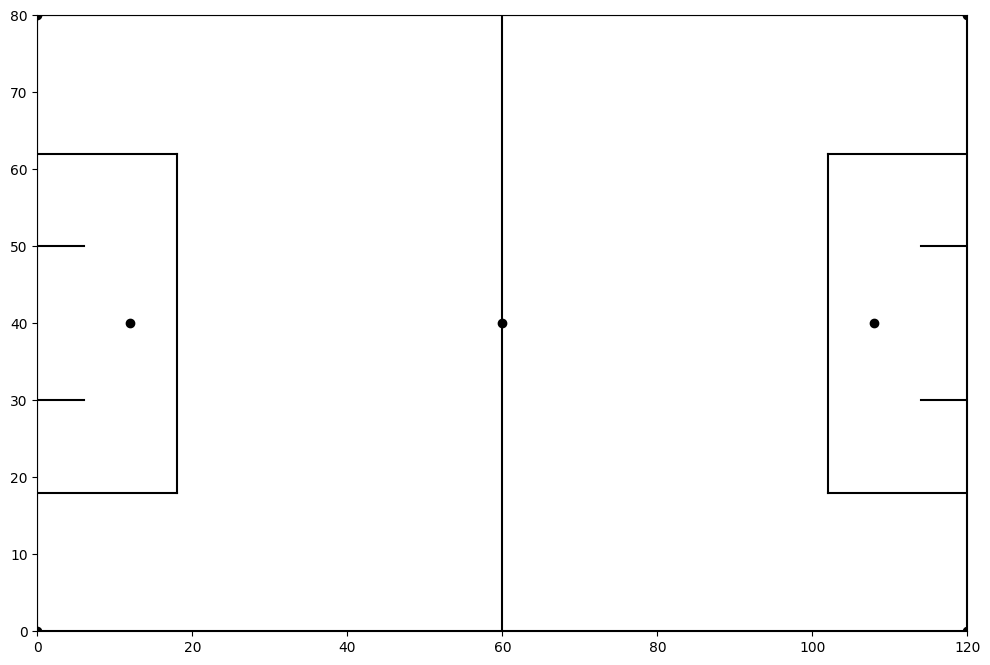

In [43]:
# fais un terrain de foot avec toutes les lignes (surfaces, ...) de 80m x 120m
fig,ax = plt.subplots(figsize=(12,8))
# terrain
ax.plot([0,0],[0,80], color = "black")
ax.plot([0,120],[80,80], color = "black")
ax.plot([120,120],[80,0], color = "black")
ax.plot([120,0],[0,0], color = "black")
# surface de réparation
ax.plot([0,18],[18,18], color = "black")
ax.plot([0,18],[62,62], color = "black")
ax.plot([120,102],[18,18], color = "black")
ax.plot([120,102],[62,62], color = "black")
ax.plot([18,18],[18,62], color = "black")
ax.plot([102,102],[18,62], color = "black")
# petit rectangle
ax.plot([0,6],[30,30], color = "black")
ax.plot([0,6],[50,50], color = "black")
ax.plot([120,114],[30,30], color = "black")
ax.plot([120,114],[50,50], color = "black")

# point central
ax.scatter(60,40, color = "black")
ax.plot([60,60],[80,0], color = "black")

# point de penalty
ax.scatter(12,40, color = "black")
ax.scatter(108,40, color = "black")

# point de corner
ax.scatter(0,0, color = "black")
ax.scatter(120,0, color = "black")
ax.scatter(0,80, color = "black")
ax.scatter(120,80, color = "black")






fouls = events[(events["type.name"]== "Foul Won")& (events["match_date"] == "2022-12-18") & (events["team.name"] == "Argentina")]
fouls_commited = events[(events["type.name"]== "Foul Committed")& (events["match_date"] == "2022-12-18")]
# placer toutes les fautes sur le terrain
ax.set_xlim([0,120])
ax.set_ylim([0,80])

for i in range(len(fouls)):
    x = fouls.iloc[i]["location"][0]
    y = 80 - fouls.iloc[i]["location"][1]
    ax.scatter(x,y, color = "red", marker="x")
    #ax.annotate(fouls.iloc[i]["player.name"], (x,y), color = "red")
    ax.annotate(fouls.iloc[i]["second"], (x,y), color = "black")


In [26]:
# tous les attributs contenant pass
pass_columns = events.columns[events.columns.str.contains("pass")]

for col in range(1,len(pass_columns)):
    if (pass_columns[col] != "pass.recipient.name") & (pass_columns[col] != "pass.end_location") & (pass_columns[col] != "pass.assisted_shot_id") & (pass_columns[col] != "shot.key_pass_id"):
        print(pass_columns[col])
        print(events[pass_columns[col]].unique())


pass.length
[      nan 32.635258 35.32209  ... 68.844246 82.64605  76.22834 ]
pass.angle
[        nan -2.6327085   0.18795665 ...  1.4564043  -2.1502936
 -2.9233508 ]
pass.height.id
[nan  1.  3.  2.]
pass.height.name
[nan 'Ground Pass' 'High Pass' 'Low Pass']
pass.body_part.id
[ nan  40.  38.  37.  68.  69.  70. 106.]
pass.body_part.name
[nan 'Right Foot' 'Left Foot' 'Head' 'Drop Kick' 'Keeper Arm' 'Other'
 'No Touch']
pass.type.id
[nan 65. 66. 67. 63. 64. 62. 61.]
pass.type.name
[nan 'Kick Off' 'Recovery' 'Throw-in' 'Goal Kick' 'Interception'
 'Free Kick' 'Corner']
pass.outcome.id
[nan  9. 75. 76. 74. 77.]
pass.outcome.name
[nan 'Incomplete' 'Out' 'Pass Offside' 'Injury Clearance' 'Unknown']
pass.cross
[nan True]
pass.cut_back
[nan True]
pass.aerial_won
[nan True]
pass.switch
[nan True]
pass.through_ball
[nan True]
pass.technique.id
[ nan 108. 105. 104. 107.]
pass.technique.name
[nan 'Through Ball' 'Outswinging' 'Inswinging' 'Straight']
pass.shot_assist
[nan True]
pass.outswinging
[na

In [27]:
events["position.name"].unique()

array([nan, 'Right Center Forward', 'Left Center Back',
       'Left Defensive Midfield', 'Right Center Back', 'Left Midfield',
       'Right Defensive Midfield', 'Left Center Forward', 'Right Back',
       'Right Midfield', 'Left Back', 'Goalkeeper', 'Center Forward',
       'Center Attacking Midfield', 'Right Wing', 'Left Wing',
       'Left Center Midfield', 'Center Defensive Midfield',
       'Right Center Midfield', 'Left Wing Back', 'Right Wing Back',
       'Center Back', 'Right Attacking Midfield',
       'Left Attacking Midfield', 'Substitute', 'Center Midfield'],
      dtype=object)

In [28]:
dissposs = eventsfinal[(eventsfinal["type.name"] == "Injury Stoppage") & (eventsfinal["player.name"] == "Damián Emiliano Martínez")]
dissposs

,match_id,competition_season,match_date,match_outcome,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,carry.end_location,pass.outcome.id,pass.outcome.name,counterpress,under_pressure,dribble.outcome.id,dribble.outcome.name,dribble.overrun,clearance.right_foot,clearance.body_part.id,clearance.body_part.name,clearance.head,pass.cross,pass.cut_back,interception.outcome.id,interception.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,off_camera,out,duel.type.id,duel.type.name,pass.aerial_won,pass.switch,clearance.aerial_won,duel.outcome.id,duel.outcome.name,ball_recovery.recovery_failure,foul_committed.card.id,foul_committed.card.name,pass.through_ball,pass.technique.id,pass.technique.name,clearance.left_foot,goalkeeper.outcome.id,goalkeeper.outcome.name,goalkeeper.type.id,goalkeeper.type.name,goalkeeper.body_part.id,goalkeeper.body_part.name,pass.assisted_shot_id,pass.shot_assist,shot.statsbomb_xg,shot.end_location,shot.key_pass_id,shot.type.id,shot.type.name,shot.outcome.id,shot.outcome.name,shot.technique.id,shot.technique.name,shot.body_part.id,shot.body_part.name,shot.freeze_frame,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.end_location,foul_won.defensive,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,shot.first_time,shot.one_on_one,pass.outswinging,miscontrol.aerial_won,pass.inswinging,pass.deflected,pass.goal_assist,clearance.other,pass.no_touch,block.offensive,block.deflection,injury_stoppage.in_chain,block.save_block,foul_committed.advantage,foul_won.advantage,dribble.nutmeg,foul_committed.type.id,foul_committed.type.name,shot.aerial_won,foul_committed.offensive,bad_behaviour.card.id,bad_behaviour.card.name,shot.deflected,shot.open_goal,ball_recovery.offensive,pass.straight,goalkeeper.punched_out,pass.miscommunication,shot.saved_to_post,goalkeeper.shot_saved_to_post,50_50.outcome.id,50_50.outcome.name,shot.saved_off_target,goalkeeper.shot_saved_off_target,player_off.permanent,dribble.no_touch,foul_committed.penalty,foul_won.penalty,shot.follows_dribble,goalkeeper.success_in_play,goalkeeper.lost_in_play,goalkeeper.success_out,shot.redirect,goalkeeper.lost_out,goalkeeper.penalty_saved_to_post,half_start.late_video_start,goalkeeper.saved_to_post,half_end.early_video_end
1124657,3869685,FIFA World Cup_2022,2022-12-18,0,e5a4e3e0-5f09-4169-8acc-cba724138019,359,1,00:09:25.483,9,25,19,0.0,40,Injury Stoppage,779,Argentina,2,From Corner,779,Argentina,NaN,NaN,NaN,NaN,6909.0,Damián Emiliano Martínez,1.0,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
events["duel.type.name"].value_counts()

duel.type.name
Tackle         25453
Aerial Lost    19338
Name: count, dtype: int64

In [30]:
pass_griezmann = events[(events["player.name"] == "Antoine Griezmann") & (events["type.name"] == "Pass") & (events["match_date"] == "2022-12-18")]
pass_griezmann.shape
# pass != nan
#pass_griezmann[pass_griezmann["pass.outcome.name"].notnull()]
pass_griezmann[pass_griezmann["pass.outcome.name"].isnull()].shape
#pass_griezmann[pass_griezmann["pass.outcome.name"].isnull()].shape[0]/pass_griezmann.shape[0]


duels_theo = events[((events["player.name"] == "Jules Koundé") | (events["player.name"] == "Nicolás Hernán Otamendi") ) & (events["type.name"] == "Duel") & (events["match_date"] == "2022-12-18")]
duels_theo[["player.name","minute", "second", "duel.outcome.name", "duel.type.name"]]
eventsfinal[(eventsfinal["minute"] == 122)& (eventsfinal["second"] > 0)][["player.name","type.name","second", "clearance.aerial_won","clearance.body_part.name","pass.outcome.name"]]

# j'aimerais avoir un count des uniques values de "type.name" pour Kylian Mbappé Lottin
print(events[(events["player.name"] == "Kylian Mbappé Lottin")]["type.name"].value_counts())

events[(events["type.name"] == "Duel")& (events["duel.outcome.name"]== "Won")].groupby("player.name").size().sort_values(ascending = False).head(10)


type.name
Ball Receipt*      3767
Carry              2699
Pass               2429
Pressure            467
Dribble             349
Shot                267
Ball Recovery       169
Miscontrol          149
Dispossessed        130
Foul Won             89
Foul Committed       49
Duel                 38
Block                35
Injury Stoppage      22
Interception         19
Dribbled Past        17
50/50                12
Substitution          9
Clearance             9
Player Off            9
Player On             9
Bad Behaviour         2
Offside               1
Name: count, dtype: int64


player.name
Lauren Hemp                 48
Jackie Groenen              40
Marco Verratti              37
Achraf Hakimi Mouh          37
Keira Walsh                 36
Sergio Busquets i Burgos    36
Chloe Arthur                34
Aileen Whelan               33
Ria Percival                32
Angharad James              31
dtype: int64

In [32]:
assist_counts = events[events["pass.assisted_shot_id"].notnull()].groupby("player.name").size()
players_with_more_than_two_assists = assist_counts[assist_counts > 25].index.tolist()

players_with_more_than_two_assists

['Achraf Hakimi Mouh',
 'Adrián Nicolás Luna Retamar',
 'Ahmed Jahouh',
 'Alberto Noguera Ripoll',
 'Alex Greenwood',
 'Angharad James',
 'Antoine Griezmann',
 'Bartholomew Owogbalor Ogbeche',
 'Bethany England',
 'Bethany Mead',
 'Caroline Weir',
 'Cecilie Redisch Kvamme',
 'Chloe Kelly',
 'Cleiton Augusto Oliveira Silva',
 'Cássio Gabriel Vilela Ferreira',
 'Danielle van de Donk',
 'Ella Toone',
 'Ellen White',
 'Erin Cuthbert',
 'Fara Williams',
 'Francesca Kirby',
 'Francisco Javier Hernández González',
 'Frenkie de Jong',
 'Georgia Stanway',
 'Greg Stewart',
 'Guro Reiten',
 'Hugo Adnan Boumous',
 'Inessa Kaagman',
 'Isobel Mary Christiansen',
 'Jackie Groenen',
 'Janine Elizabeth Beckie',
 'Jessica Fishlock',
 'Jill Roord',
 'Jill Scott',
 'Joel Joseph Chianese',
 'Jonna Ann-Charlotte Andersson',
 'Jordan Nobbs',
 'Jordi Alba Ramos',
 'Jorge Ortiz Mendoza',
 'Jorge Rolando Pereyra Díaz',
 'Katie McCabe',
 'Katie Zelem',
 'Kayleigh Green',
 'Keira Walsh',
 'Kenza Dali',
 'Kim Litt

In [153]:
# pass_griezmann = events[(events["player.name"] == "Antoine Griezmann") & (events["type.name"] == "Pass") & (events["match_date"] == "2022-12-18")]
# pass_griezmann.shape
# # pass != nan
# #pass_griezmann[pass_griezmann["pass.outcome.name"].notnull()]
# pass_griezmann[pass_griezmann["pass.outcome.name"].isnull()].shape
# #pass_griezmann[pass_griezmann["pass.outcome.name"].isnull()].shape[0]/pass_griezmann.shape[0]

def get_passes_before_date(player_name, match_date, events):
    # Récupérer les passes du joueur
    player_passes = events[(events["player.name"] == player_name) & (events["type.name"] == "Pass") & (events["match_date"] < match_date)]
    # Récupérer les passes réussies

    player_successful_passes_percentage = player_passes[player_passes["pass.outcome.name"].isnull()].shape[0]/player_passes.shape[0]

    return player_successful_passes_percentage

In [154]:
goalkeepers = ["Goalkeeper"]
defensive_players = ["Right Center Back", "Left Center Back", "Right Back", "Left Back",'Center Back','Left Defensive Midfield', 'Right Defensive Midfield', "Right Wing Back",'Left Wing Back',]
midfielders = ["Right Midfield", "Left Midfield", "Center Midfield", "Right Center Midfield", "Left Center Midfield"]
offensive_players = ['Center Forward', "Right Wing", "Left Wing", 'Center Attacking Midfield', 'Left Center Forward', 'Right Center Forward','Left Attacking Midfield', 'Right Attacking Midfield']

In [155]:
def extract_player_names(tactics_lineup):
    return [player["player"]["name"] for player in tactics_lineup]
def extract_player_position(tactics_lineup):
    return [player["position"]["name"] for player in tactics_lineup]

In [156]:
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# Créer le DataFrame initial
startingXI = pd.DataFrame(columns=["match_id", "competition_season", "match_date", "match_outcome", "player_1", "player_2", "player_3", "player_4", "player_5", "player_6", "player_7", "player_8", "player_9", "player_10", "player_11", "player_12", "player_13", "player_14", "player_15", "player_16", "player_17", "player_18", "player_19", "player_20", "player_21", "player_22"])


# Créer un dictionnaire pour stocker les buts de chaque joueur avant chaque date de match

player_goals_cache = {}
player_appearances_cache = {}
player_assist_cache = {}
player_keypass_cache = {}
player_clearance_cache = {}

for match_date in lineup['match_date'].unique():
    lineups_for_date = lineup[lineup["match_date"] == match_date]["tactics.lineup"]
    match_goals = events[(events["shot.outcome.name"] == "Goal") & 
                         (events['match_date'] < match_date)]

    goals_conceded = events[((events["goalkeeper.type.name"] == "Goal Conceded") | (events["goalkeeper.type.name"] == "Penalty Conceded"))
                             &
                            (events['match_date'] < match_date)]
    match_keypass = events[(events["type.name"] == "Pass") & (events["pass.assisted_shot_id"].notnull()) & (events['match_date'] < match_date)]
    match_assists = events[(events["type.name"] == "Pass") & (events["pass.goal_assist"] == True) & (events['match_date'] < match_date)]
    match_clearance = events[(events["type.name"] == "Clearance") & (events['match_date'] < match_date)]
    match_recovers = events[(events["type.name"] == "Ball Recovery") & (events['match_date'] < match_date)]
    match_duels = events[(events["type.name"] == "Duel") & (events["duel.outcome.name"] == "Won")& (events['match_date'] < match_date)]
    match_blocks = events[(events["type.name"] == "Block") & (events['match_date'] < match_date)]

    for tactics_lineup in lineups_for_date:
        # Assurez-vous que tactics_lineup est une liste avant de l'envoyer à la fonction
        if isinstance(tactics_lineup, list):
            player_names = extract_player_names(tactics_lineup)
            player_positions = extract_player_position(tactics_lineup)

            # Créer un mapping de noms de joueurs à leurs positions pour cette date
            player_to_position = dict(zip(player_names, player_positions))

            for player, position in player_to_position.items():
                player_appearances_cache[(player, match_date)] = events[(events["player.name"] == player) & (events['match_date'] < match_date)].groupby('match_id').first().reset_index().shape[0]
                player_assist_cache[(player, match_date)] = match_assists[match_assists["player.name"] == player].shape[0]
                player_keypass_cache[(player, match_date)] = match_keypass[match_keypass["player.name"] == player].shape[0]
                if position == 'Goalkeeper':
                    player_goals_cache[(player, match_date)] = goals_conceded[goals_conceded["player.name"] == player].shape[0]
                elif position in defensive_players:
                    player_goals_cache[(player, match_date)] = (
                        (match_clearance[match_clearance["player.name"] == player].shape[0])*0.2) + (
                            (match_recovers[match_recovers["player.name"] == player].shape[0])*0.3) + (
                                (match_duels[match_duels["player.name"] == player].shape[0])*0.3) + (
                                    (match_blocks[match_blocks["player.name"] == player].shape[0])*0.2)
                else:
                    player_goals_cache[(player, match_date)] = match_goals[match_goals["player.name"] == player].shape[0]




lineup.reset_index(drop=True, inplace=True)

for i in range(0, len(lineup), 2):
    # Extraire les informations pour les deux équipes
    team1_lineup = lineup["tactics.lineup"][i]
    team2_lineup = lineup["tactics.lineup"][i + 1]

    # Vérifier que chaque équipe a 11 joueurs
    if len(team1_lineup) < 11 or len(team2_lineup) < 11:
        continue  # ou gérer l'erreur comme vous le souhaitez

    player_names = extract_player_names(team1_lineup) + extract_player_names(team2_lineup)
    player_positions = extract_player_position(team1_lineup) + extract_player_position(team2_lineup)
    lineup_data = {
        "match_id": lineup["match_id"][i], 
        "competition_season": lineup["competition_season"][i], 
        "match_date": lineup["match_date"][i],
        "match_outcome": lineup["match_outcome"][i],
        **{f"player_{j+1}": player_names[j] for j in range(22)},
        **{f"player_{j+1}_position": player_positions[j] for j in range(22)},
        **{
            f"player_{j+1}_goals": (
                player_goals_cache.get((player_names[j], lineup["match_date"][i]), 0) / 
                player_appearances_cache.get((player_names[j], lineup["match_date"][i]), 1)
                if player_appearances_cache.get((player_names[j], lineup["match_date"][i]), 1) != 0 else 0
            ) for j in range(22)
            },
        **{
            f"player_{j+1}_assists": (
                player_assist_cache.get((player_names[j], lineup["match_date"][i]), 0) / 
                player_appearances_cache.get((player_names[j], lineup["match_date"][i]), 1)
                if player_appearances_cache.get((player_names[j], lineup["match_date"][i]), 1) != 0 else 0
            ) for j in range(22)
            },
        **{
            f"player_{j+1}_keypass": (
                player_keypass_cache.get((player_names[j], lineup["match_date"][i]), 0) / 
                player_appearances_cache.get((player_names[j], lineup["match_date"][i]), 1)
                if player_appearances_cache.get((player_names[j], lineup["match_date"][i]), 1) != 0 else 0
            ) for j in range(22)
            }
    }

    Newlineup = pd.DataFrame([lineup_data])
    startingXI = pd.concat([startingXI, Newlineup], ignore_index=True)

In [157]:
events[(events["shot.outcome.name"] == "Goal")].shape[0]

326

In [158]:
startingXI[startingXI["match_date"] > "2022-12-12"]

,match_id,competition_season,match_date,match_outcome,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9,player_10,player_11,player_12,player_13,player_14,player_15,player_16,player_17,player_18,player_19,player_20,player_21,player_22,player_1_position,player_2_position,player_3_position,player_4_position,player_5_position,player_6_position,player_7_position,player_8_position,player_9_position,player_10_position,player_11_position,player_12_position,player_13_position,player_14_position,player_15_position,player_16_position,player_17_position,player_18_position,player_19_position,player_20_position,player_21_position,player_22_position,player_1_goals,player_2_goals,player_3_goals,player_4_goals,player_5_goals,player_6_goals,player_7_goals,player_8_goals,player_9_goals,player_10_goals,player_11_goals,player_12_goals,player_13_goals,player_14_goals,player_15_goals,player_16_goals,player_17_goals,player_18_goals,player_19_goals,player_20_goals,player_21_goals,player_22_goals,player_1_assists,player_2_assists,player_3_assists,player_4_assists,player_5_assists,player_6_assists,player_7_assists,player_8_assists,player_9_assists,player_10_assists,player_11_assists,player_12_assists,player_13_assists,player_14_assists,player_15_assists,player_16_assists,player_17_assists,player_18_assists,player_19_assists,player_20_assists,player_21_assists,player_22_assists,player_1_keypass,player_2_keypass,player_3_keypass,player_4_keypass,player_5_keypass,player_6_keypass,player_7_keypass,player_8_keypass,player_9_keypass,player_10_keypass,player_11_keypass,player_12_keypass,player_13_keypass,player_14_keypass,player_15_keypass,player_16_keypass,player_17_keypass,player_18_keypass,player_19_keypass,player_20_keypass,player_21_keypass,player_22_keypass
9,3869685,FIFA World Cup_2022,2022-12-18,0,Damián Emiliano Martínez,Nahuel Molina Lucero,Cristian Gabriel Romero,Nicolás Hernán Otamendi,Nicolás Alejandro Tagliafico,Enzo Fernandez,Rodrigo Javier De Paul,Alexis Mac Allister,Lionel Andrés Messi Cuccittini,Ángel Fabián Di María Hernández,Julián Álvarez,Hugo Lloris,Jules Koundé,Raphaël Varane,Dayotchanculle Upamecano,Theo Bernard François Hernández,Aurélien Djani Tchouaméni,Adrien Rabiot,Ousmane Dembélé,Antoine Griezmann,Kylian Mbappé Lottin,Olivier Giroud,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Center Defensive Midfield,Right Center Midfield,Left Center Midfield,Right Wing,Left Wing,Center Forward,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Right Defensive Midfield,Left Defensive Midfield,Right Wing,Center Attacking Midfield,Left Wing,Center Forward,0.666667,1.366667,1.533333,2.430000,1.600000,0.166667,0.000000,0.200000,0.600000,0.142857,0.666667,0.909091,1.600000,1.916667,2.475,2.380,1.833333,2.020000,0.00,0.307692,0.692308,0.333333,0.0,0.166667,0.0,0.100000,0.000000,0.166667,0.000000,0.000000,0.400000,0.142857,0.000000,0.0,0.000000,0.000000,0.0,0.400,0.000000,0.200000,0.20,0.384615,0.153846,0.083333,0.0,0.5,0.0,0.200000,0.555556,0.833333,1.000000,1.400000,2.600000,1.428571,0.166667,0.0,0.4,0.000000,0.25,2.400,1.000000,0.400000,1.40,2.076923,1.538462,0.583333
18,3869684,FIFA World Cup_2022,2022-12-17,1,Dominik Livaković,Josip Stanišić,Josip Šutalo,Joško Gvardiol,Ivan Perišić,Luka Modrić,Mateo Kovačić,Lovro Majer,Andrej Kramarić,Mislav Oršić,Marko Livaja,Yassine Bounou,Achraf Hakimi Mouh,Jawad El Yamiq,Achraf Dari,Yahia Attiyat allah,Sofyan Amrabat,Bilal El Khannous,Abdelhamid Sabiri,Hakim Ziyech,Sofiane Boufal,Youssef En-Nesyri,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Right Defensive Midfield,Left Defensive Midfield,Right Wing,Center Attacking Midfield,Left Wing,Center Forward,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Center Defensive Midfield,Right Center Midfield,Left Center Midfield,Right Wing,Left Wing,Center Forward,1.000000,0.000000,0.000000,3.366667,1.446154,2.238462,1.727273,0.166667,0.230769,0.000000,0.200000,0.40

In [180]:
## encoder les positions et les noms des joueurs

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in startingXI.columns:
    if col.endswith("position"):
        startingXI[col] = le.fit_transform(startingXI[col])
    elif col.startswith("player"):
        startingXI[col] = le.fit_transform(startingXI[col])

startingXI["match_outcome"] = startingXI["match_outcome"].astype(int)
# mettre 1 si victoire, -1 si défaite et 0 si nul
startingXI["match_outcome"] = startingXI["match_outcome"].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))


In [194]:
## predit match outcome avec startingXI

X_train, X_test, y_train, y_test = train_test_split(startingXI.drop(["match_id", "competition_season", "match_date", "match_outcome"], axis = 1), startingXI["match_outcome"], test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state=43)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)




0.38461538461538464

Accuracy: 0.3076923076923077
              precision    recall  f1-score   support

          -1       0.30      0.30      0.30        10
           0       0.00      0.00      0.00         7
           1       0.31      0.56      0.40         9

    accuracy                           0.31        26
   macro avg       0.20      0.29      0.23        26
weighted avg       0.22      0.31      0.25        26



/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

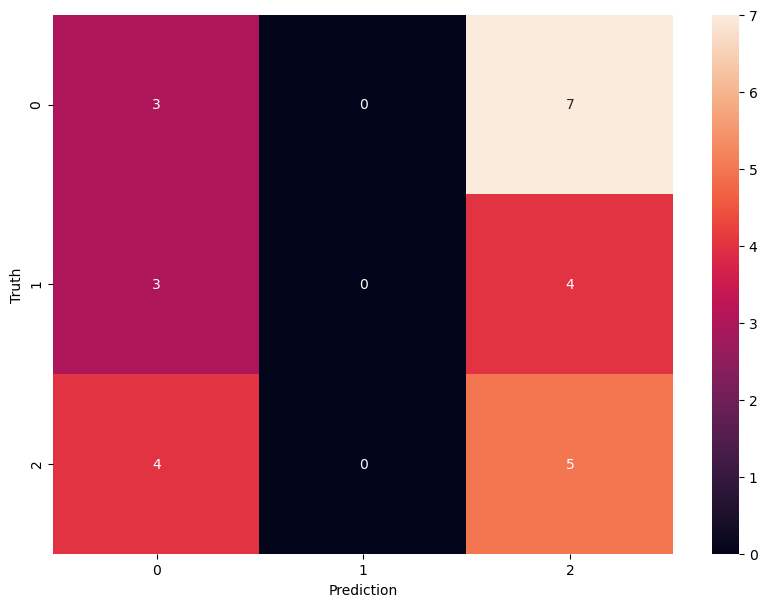

In [193]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Truth')



print("Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


In [196]:
eventsfinal.shape

(4386, 146)